<Figure size 1200x600 with 0 Axes>

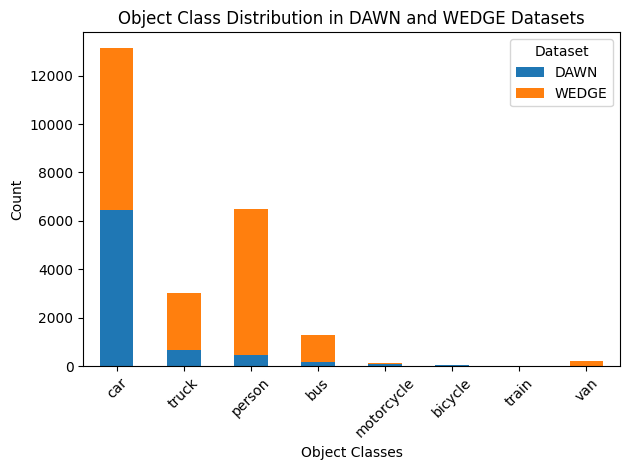

In [14]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import xml.etree.ElementTree as ET
import os

# DAWN dataset summary
dawn_data = {
    'class': ['car', 'truck', 'person', 'bus', 'motorcycle', 'bicycle', 'train'],
    'count': [6454, 646, 477, 161, 81, 26, 1]
}
dawn_weather_data = {
    'weather': ['Fog', 'Snow', 'Rain', 'Sand'],
    'count': [1951, 2072, 1588, 2235]
}

# WEDGE dataset summary
wedge_data = {
    'class': ['car', 'person', 'truck', 'bus', 'van', 'motorcycle', 'bicycle'],
    'count': [6677, 6023, 2393, 1143, 212, 58, 7]
}

# WEDGE weather data
wedge_weather_data = {
    'weather': ['spring', 'day', 'rain', 'summer', 'fall', 'cloudy', 'sun', 'tornado',
               'night', 'winter', 'lightning', 'fog', 'dust', 'hurricane', 'windy'],
    'count': [1801, 1273, 1223, 1205, 1156, 1134, 1106, 1053,
              1053, 1053, 1053, 1053, 1053, 1053, 1053]
}


# Convert data to DataFrames
dawn_df = pd.DataFrame(dawn_data)
wedge_df = pd.DataFrame(wedge_data)
dawn_weather_df = pd.DataFrame(dawn_weather_data)
wedge_weather_df = pd.DataFrame(wedge_weather_data)

# Combine DAWN and WEDGE datasets for class counts
combined_classes = pd.concat([dawn_df.set_index('class'), wedge_df.set_index('class')], axis=1).fillna(0)
combined_classes.columns = ['DAWN', 'WEDGE']

# Plot Object Class Distribution (Stacked Bar Chart)
plt.figure(figsize=(12, 6))
combined_classes.plot(kind='bar', stacked=True)
plt.title('Object Class Distribution in DAWN and WEDGE Datasets')
plt.xlabel('Object Classes')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Dataset')
plt.tight_layout()
plt.show()



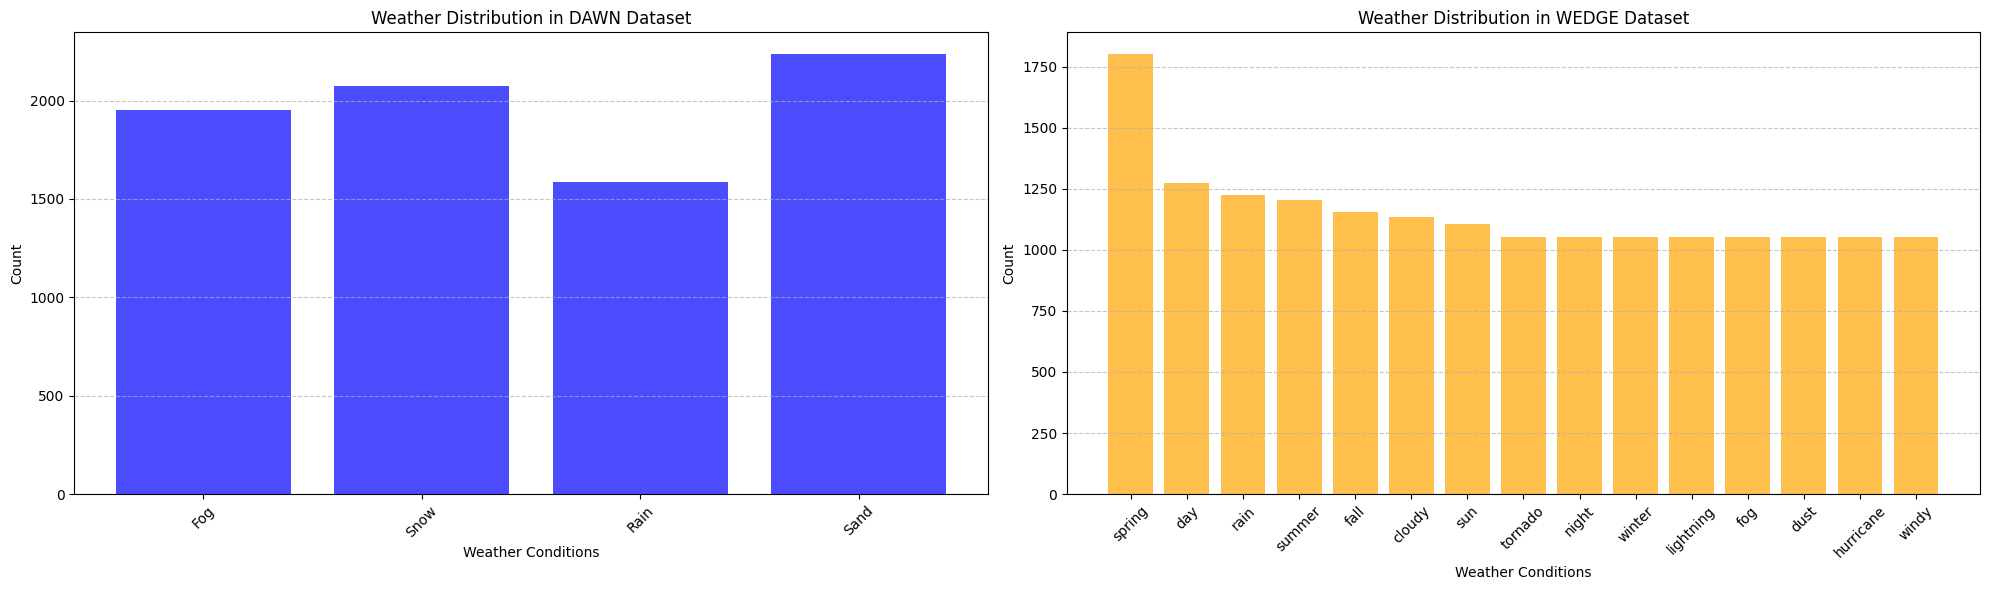

In [15]:
# Create subplots for comparison
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))

# Plot DAWN weather distribution
ax1.bar(dawn_weather_df['weather'], dawn_weather_df['count'], color='blue', alpha=0.7)
ax1.set_title('Weather Distribution in DAWN Dataset')
ax1.set_xlabel('Weather Conditions')
ax1.set_ylabel('Count')
ax1.tick_params(axis='x', rotation=45)
ax1.grid(axis='y', linestyle='--', alpha=0.7)

# Plot WEDGE weather distribution
ax2.bar(wedge_weather_df['weather'], wedge_weather_df['count'], color='orange', alpha=0.7)
ax2.set_title('Weather Distribution in WEDGE Dataset')
ax2.set_xlabel('Weather Conditions')
ax2.set_ylabel('Count')
ax2.tick_params(axis='x', rotation=45)
ax2.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


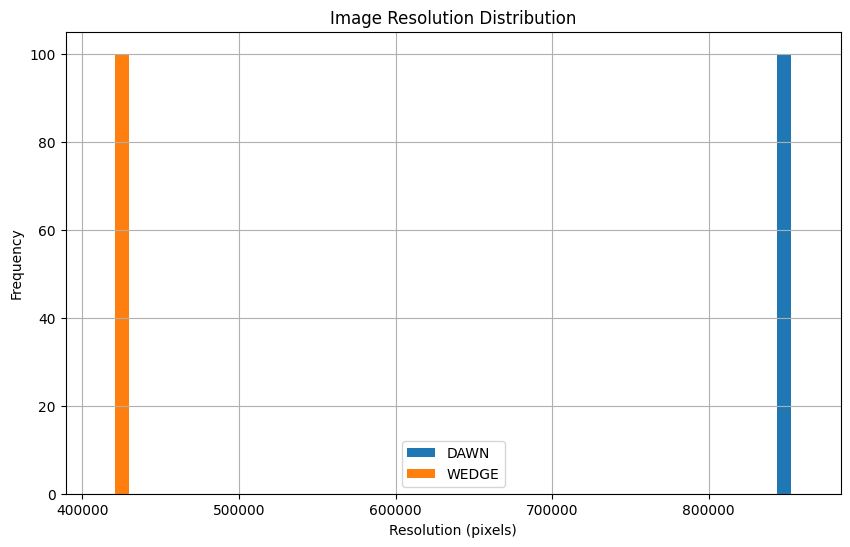

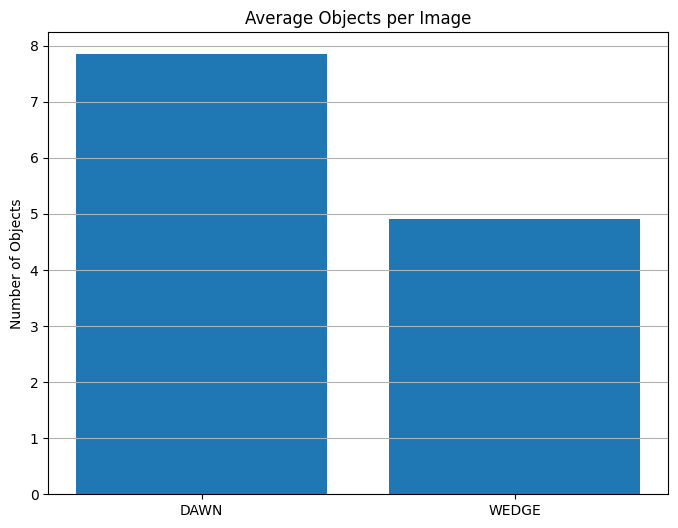

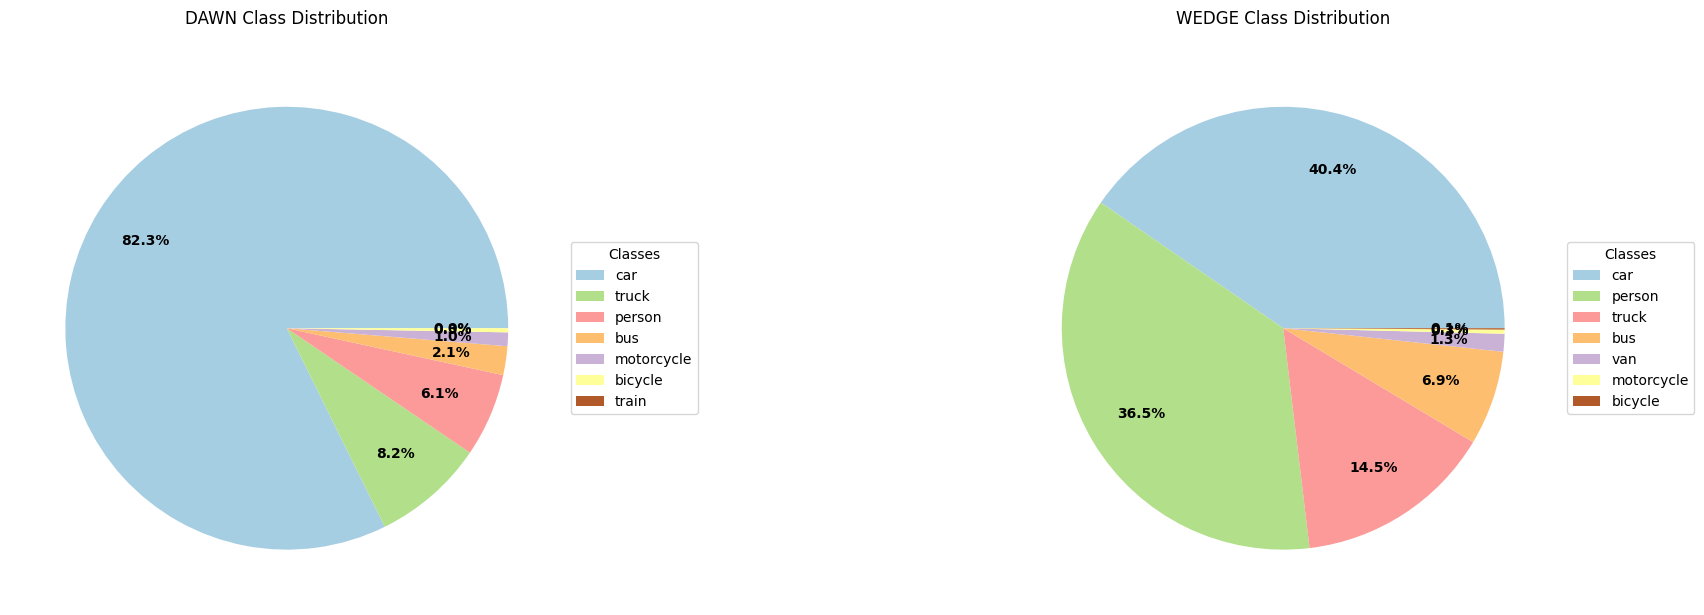

In [16]:
# 1. Image Resolution Distribution
def plot_resolution_distribution():
    # DAWN uses 1280x675 resolution
    # WEDGE uses 640x640 resolution
    dawn_res = [1280 * 675] * 100  # Multiplied by sample size for visualization
    wedge_res = [640 * 640] * 100
    
    plt.figure(figsize=(10, 6))
    plt.hist([dawn_res, wedge_res], label=['DAWN', 'WEDGE'], bins=20)
    plt.title('Image Resolution Distribution')
    plt.xlabel('Resolution (pixels)')
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid(True)
    plt.show()

# 2. Objects per Image Distribution
def plot_objects_density():
    # Calculate average objects per image
    dawn_total_objects = 7846  # Total objects in DAWN
    wedge_total_objects = 16513  # Total objects in WEDGE
    dawn_images = 1000  # Approximate number of images
    wedge_images = 3360
    
    densities = {
        'Dataset': ['DAWN', 'WEDGE'],
        'Objects per Image': [dawn_total_objects/dawn_images, 
                            wedge_total_objects/wedge_images]
    }
    
    df = pd.DataFrame(densities)
    plt.figure(figsize=(8, 6))
    plt.bar(df['Dataset'], df['Objects per Image'])
    plt.title('Average Objects per Image')
    plt.ylabel('Number of Objects')
    plt.grid(axis='y')
    plt.show()

def plot_class_balance_with_legends():
    dawn_classes = {
        'Class': ['car', 'truck', 'person', 'bus', 'motorcycle', 'bicycle', 'train'],
        'Percentage': [82.3, 8.2, 6.1, 2.1, 1.0, 0.3, 0.0]
    }
    wedge_classes = {
        'Class': ['car', 'person', 'truck', 'bus', 'van', 'motorcycle', 'bicycle'],
        'Percentage': [40.4, 36.5, 14.5, 6.9, 1.3, 0.3, 0.1]
    }
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
    
    colors = plt.cm.Paired(np.linspace(0, 1, 7))
    
    # DAWN pie chart
    wedges1, _, autotexts1 = ax1.pie(dawn_classes['Percentage'], 
                                    labels=None,  # Remove labels from pie
                                    autopct='%1.1f%%',
                                    pctdistance=0.75,
                                    colors=colors)
    ax1.set_title('DAWN Class Distribution', pad=20)
    
    # WEDGE pie chart
    wedges2, _, autotexts2 = ax2.pie(wedge_classes['Percentage'],
                                    labels=None,  # Remove labels from pie
                                    autopct='%1.1f%%',
                                    pctdistance=0.75,
                                    colors=colors)
    ax2.set_title('WEDGE Class Distribution', pad=20)
    
    # Add legends
    ax1.legend(wedges1, dawn_classes['Class'], 
              title="Classes",
              loc="center left",
              bbox_to_anchor=(1, 0.5))
    
    ax2.legend(wedges2, wedge_classes['Class'],
              title="Classes",
              loc="center left",
              bbox_to_anchor=(1, 0.5))
    
    # Enhance the appearance of percentage labels
    plt.setp(autotexts1 + autotexts2, size=10, weight="bold")
    
    # Adjust layout to prevent overlap
    plt.subplots_adjust(wspace=0.8)
    
    plt.show()



# Execute all plots
plot_resolution_distribution()
plot_objects_density()
plot_class_balance_with_legends()


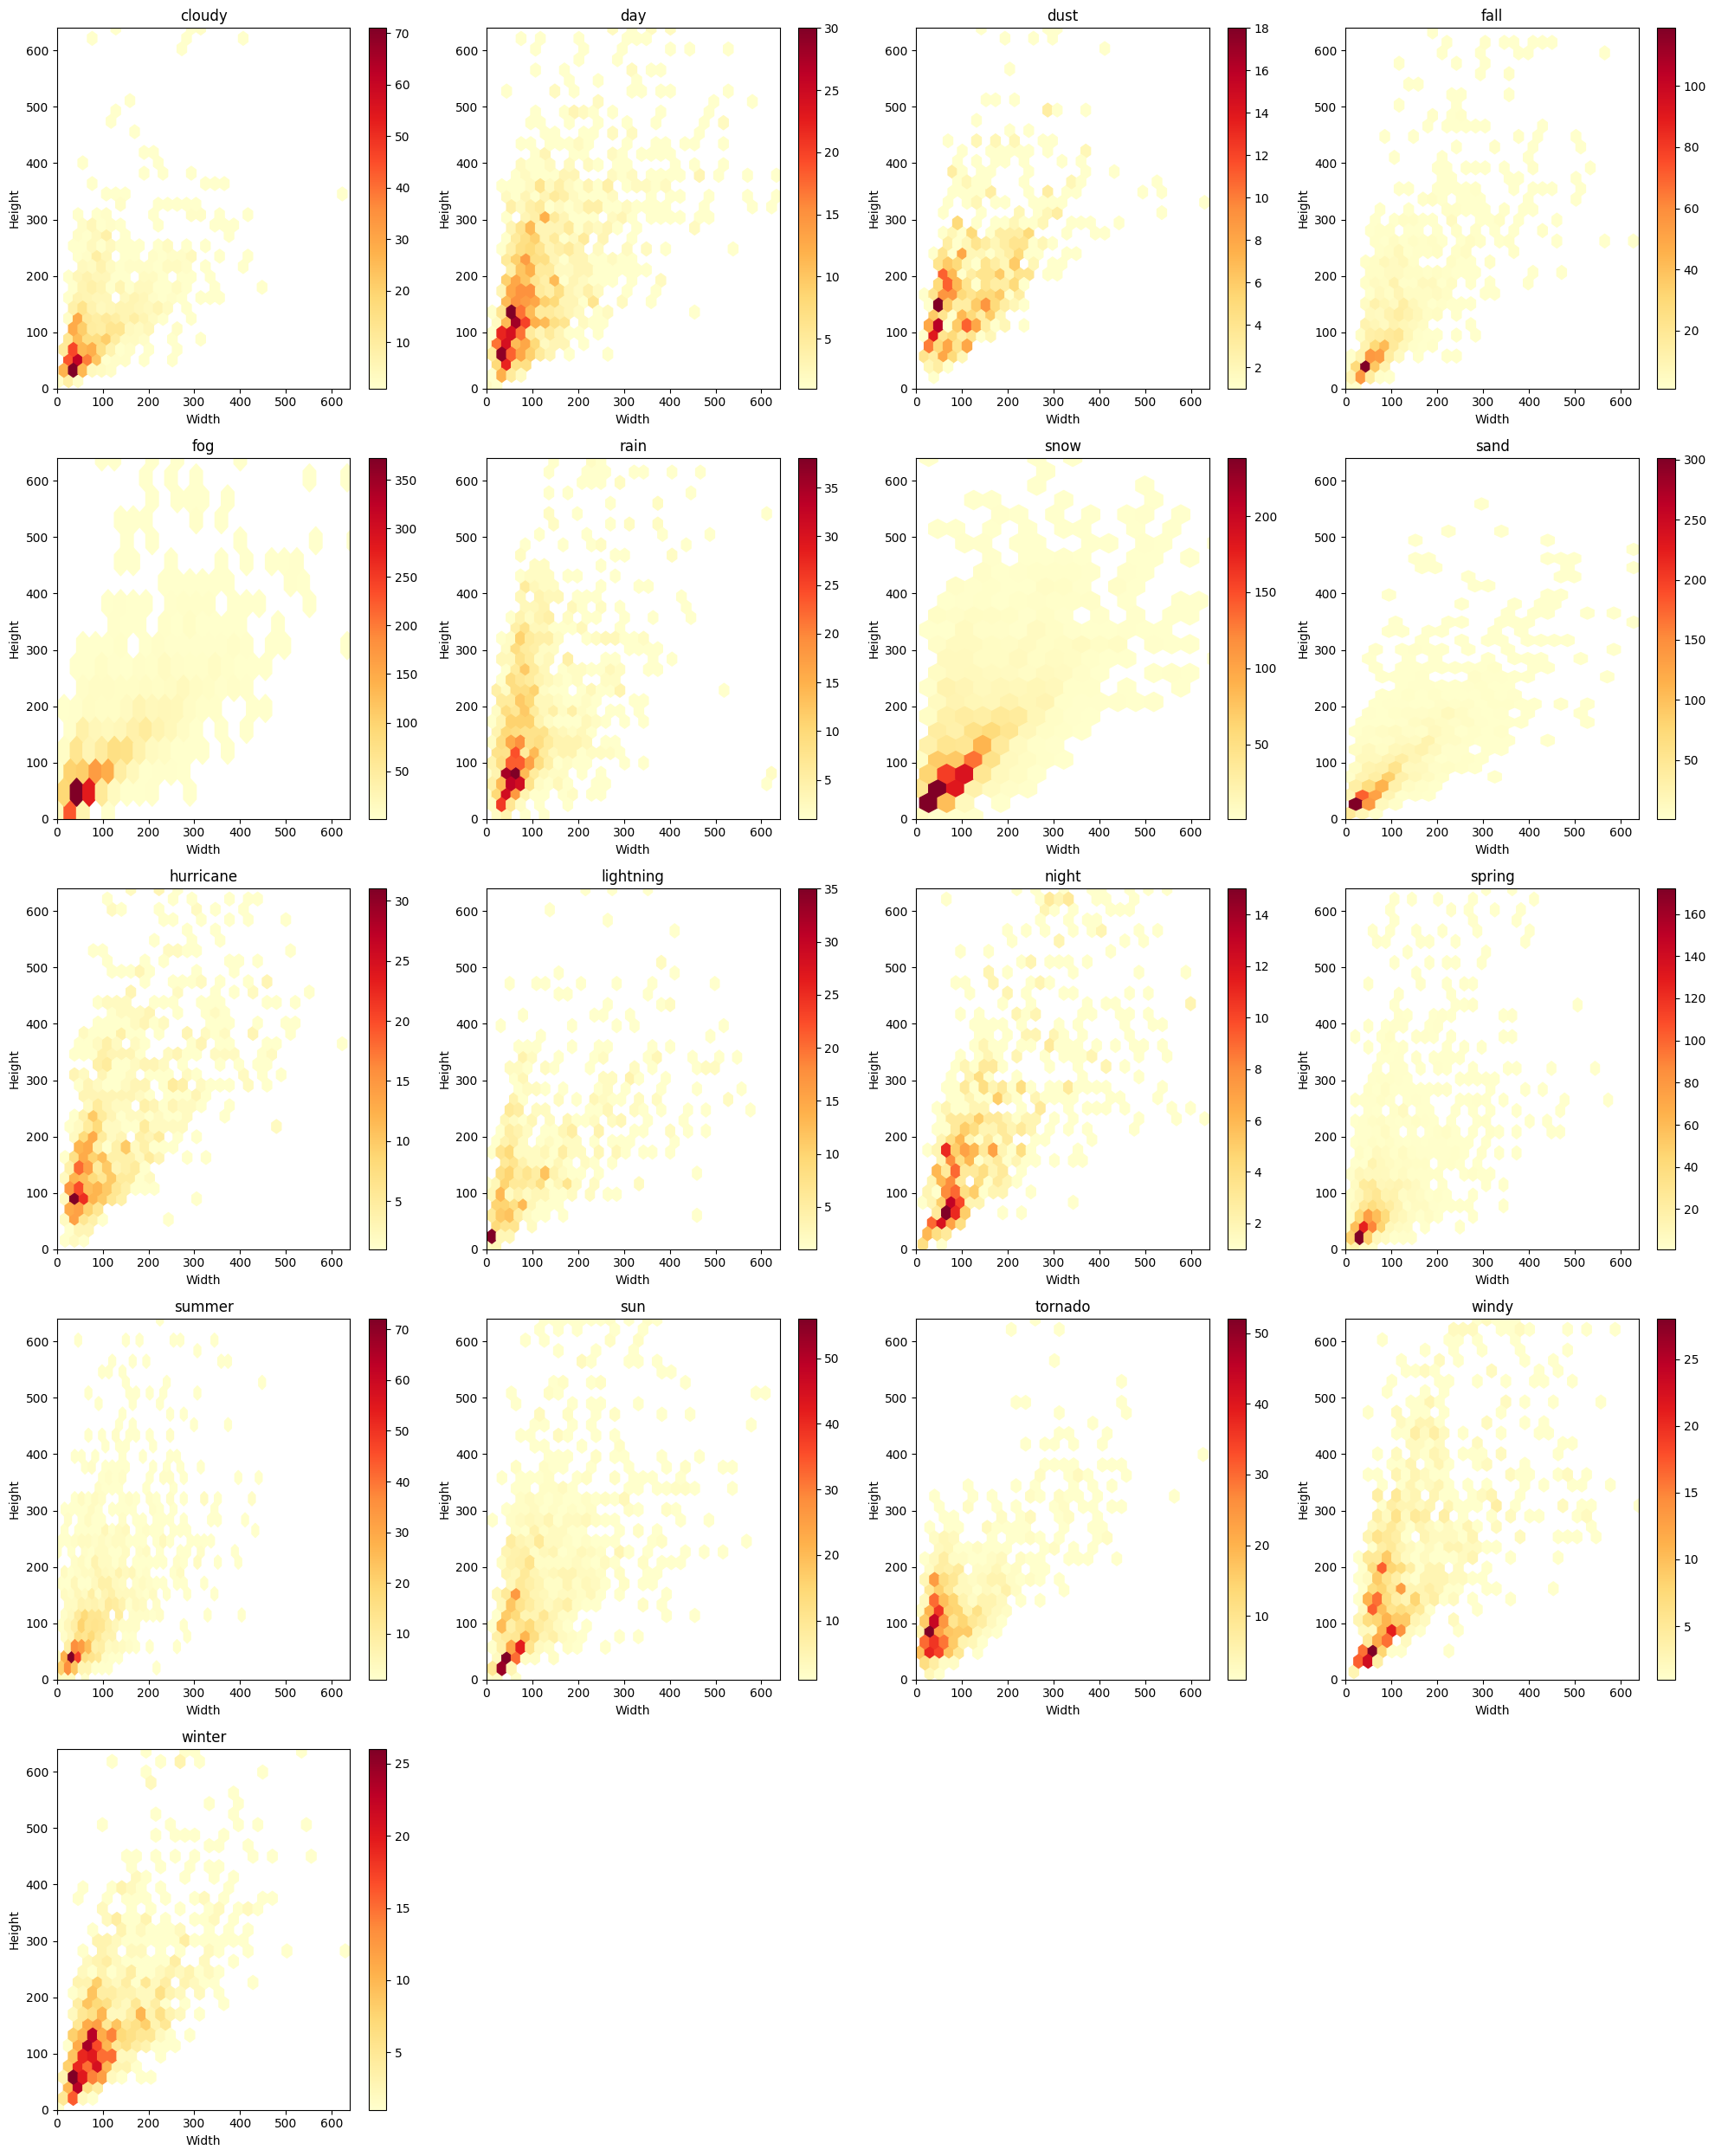

In [ ]:
def get_xml_files(directory):
    """Get all XML files from directory"""
    return [os.path.join(directory, f) for f in os.listdir(directory) if f.endswith('.xml')]

def prepare_merged_dataset(input_directory):
    """
    Prepare merged dataset from DAWN and WEDGE annotations
    """
    merged_data = {
        'width': [],
        'height': [],
        'weather': []
    }
    
    # Get all XML files from directory
    xml_files = get_xml_files(input_directory)
    
    for xml_file in xml_files:
        try:
            tree = ET.parse(xml_file)
            root = tree.getroot()
            
            # Extract weather from folder or filename
            folder = root.find('folder')
            if folder is not None and folder.text:
                weather = folder.text.split('_')[-1]
            else:
                filename = root.find('filename').text
                weather = filename.split('_')[0]
            
            # Extract bounding boxes
            for obj in root.findall('object'):
                bbox = obj.find('bndbox')
                if bbox is not None:
                    width = int(bbox.find('xmax').text) - int(bbox.find('xmin').text)
                    height = int(bbox.find('ymax').text) - int(bbox.find('ymin').text)
                    
                    merged_data['width'].append(width)
                    merged_data['height'].append(height)
                    merged_data['weather'].append(weather)
                    
        except Exception as e:
            print(f"Error processing {xml_file}: {e}")
    
    return pd.DataFrame(merged_data)

def create_hexbin_plots(data):
    """Create hexbin plots for all weather conditions"""
    weather_conditions = ['cloudy', 'day', 'dust', 'fall', 'fog', 'rain', 'snow', 'sand',
                         'hurricane', 'lightning', 'night', 'spring', 'summer', 'sun', 
                         'tornado', 'windy', 'winter']
    
    n_cols = 4
    n_rows = (len(weather_conditions) + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5*n_rows))
    axes = axes.flatten()
    
    for idx, weather in enumerate(weather_conditions):
        weather_data = data[data['weather'] == weather]
        
        if not weather_data.empty:
            hb = axes[idx].hexbin(weather_data['width'], 
                                weather_data['height'],
                                gridsize=30,
                                cmap='YlOrRd',
                                mincnt=1)
            
            axes[idx].set_title(f'{weather}')
            axes[idx].set_xlabel('Width')
            axes[idx].set_ylabel('Height')
            axes[idx].set_xlim(0, 640)
            axes[idx].set_ylim(0, 640)
            plt.colorbar(hb, ax=axes[idx])
    
    # Remove empty subplots
    for idx in range(len(weather_conditions), len(axes)):
        fig.delaxes(axes[idx])
    
    plt.tight_layout()
    plt.show()

# Usage
input_directory = "EAVV"
merged_df = prepare_merged_dataset(input_directory)
create_hexbin_plots(merged_df)


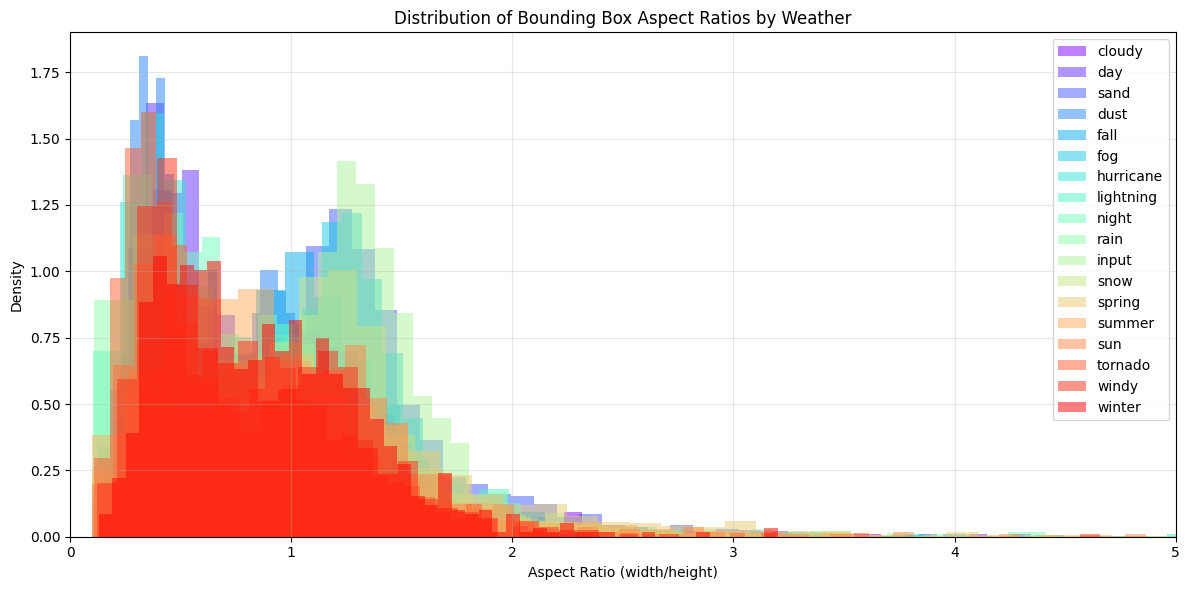

In [ ]:
def get_aspect_ratios_from_xmls(input_directory):
    """Extract aspect ratios from XML files"""
    weather_aspect_ratios = {}
    
    for file_name in os.listdir(input_directory):
        if file_name.endswith('.xml'):
            try:
                tree = ET.parse(os.path.join(input_directory, file_name))
                root = tree.getroot()
                
                # Get weather condition
                folder = root.find('folder')
                if folder is not None and folder.text:
                    weather = folder.text.split('_')[-1]
                else:
                    filename = root.find('filename').text
                    weather = filename.split('_')[0]
                
                # Initialize weather category if not exists
                if weather not in weather_aspect_ratios:
                    weather_aspect_ratios[weather] = []
                
                # Extract bounding box dimensions and calculate aspect ratio
                for obj in root.findall('object'):
                    bbox = obj.find('bndbox')
                    if bbox is not None:
                        width = float(bbox.find('xmax').text) - float(bbox.find('xmin').text)
                        height = float(bbox.find('ymax').text) - float(bbox.find('ymin').text)
                        if height > 0:  # Avoid division by zero
                            aspect_ratio = width / height
                            weather_aspect_ratios[weather].append(aspect_ratio)
                            
            except Exception as e:
                print(f"Error processing {file_name}: {e}")
    
    return weather_aspect_ratios
def create_aspect_ratio_plot(weather_aspect_ratios):
    plt.figure(figsize=(12, 6))
    
    colors = plt.cm.rainbow(np.linspace(0, 1, len(weather_aspect_ratios)))
    
    for (weather, aspect_ratios), color in zip(weather_aspect_ratios.items(), colors):
        # Filter out extreme outliers (aspect ratios > 10 or < 0.1)
        filtered_ratios = [r for r in aspect_ratios if 0.1 <= r <= 10]
        plt.hist(filtered_ratios, bins=50, alpha=0.5, label=weather, color=color, density=True)
    
    plt.title('Distribution of Bounding Box Aspect Ratios by Weather')
    plt.xlabel('Aspect Ratio (width/height)')
    plt.ylabel('Density')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.xlim(0, 5)  # Limit x-axis to ratios between 0 and 5 for better visibility
    plt.tight_layout()
    plt.show()
# Get aspect ratios from XML files
input_directory = "EAVV"
weather_aspect_ratios = get_aspect_ratios_from_xmls(input_directory)

# Create the plot using the provided function
create_aspect_ratio_plot(weather_aspect_ratios)
